## Assignment 5:

### Arun Agarwal
#### 915774866
### Homework 5
2/16/2022 - 2/19/2022

### Problem 1:
Download Census Income data set from UCI repository - link is https://archive.ics.uci.edu/ml/datasets/census+income (Links to an external site.)

Use training data to develop a model aimed to determine whether a person makes over 50K a year.

Solve this problem using the k-nearest neighbors’ method with k=3 and k=9 and report F1 score on test data.

In [1]:
#Imports:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
# I will start by doing data preprocessing/cleaning. I noticed that the site said there was missing values in the dataset:
census = pd.read_csv('adult.data', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target'])
print("Length of Census Dataset: ", len(census))

#Replacing missing values with nan:
census = census.replace(' ?', np.nan)

#Finding out which features contain missing values:
print("Features with missing values: \n", census.isnull().sum())

Length of Census Dataset:  32561
Features with missing values: 
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64


Therefore, we see the features with missing values are merely workclass, occupation, and native-country. Since these features are important, we cannot just remove them totally. At the same time, we have a lot of data available to us (32561 instances), so it seems okay to simply remove the rows/instances with null values. We could try to fill these values using average values/mode, but in this case, that seems like falsification of data. Furthermore, the instructions did not specify that we should deal with missing values a certain way, so I will do this by simply removing the instances with null values

In [3]:
#Dropping nan values:
census = census.dropna()

#Viewing the Dataset as of now:
census

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


For my own reference, this is a list of the possible values for each feature of the dataset, provided by https://archive.ics.uci.edu/ml/datasets/census+income:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target Column: >50k, <=50k

In [4]:
#Getting some more info on the dataset:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  target          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We now see that there are numerous integer-value features, but also many categorical features, which would probably be good to change using a labelencoder/dummy encoder.

In [5]:
#Making dummy variables to run KNN algorithm
census_dummy = pd.get_dummies(census)

#Getting the number of features to use for separating X (features) and y (target)
last_index = len(census_dummy.columns)

X = census_dummy[census_dummy.columns[1:(last_index-2)]]
y = census_dummy[census_dummy.columns[last_index - 1]]

print("X: \n", X)
print("y: \n", y)

X: 
        fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       77516             13          2174             0              40   
1       83311             13             0             0              13   
2      215646              9             0             0              40   
3      234721              7             0             0              40   
4      338409             13             0             0              40   
...       ...            ...           ...           ...             ...   
32556  257302             12             0             0              38   
32557  154374              9             0             0              40   
32558  151910              9             0             0              40   
32559  201490              9             0             0              20   
32560  287927              9         15024             0              40   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0      

In [6]:
census['target'].value_counts()

 <=50K    22654
 >50K      7508
Name: target, dtype: int64

We notice that the dataset does not have an even distribution of data for the two target variable classifications. In fact, there are almost three times as many values for those with salary less than 50000 than greater than 50000. This might make our model perform poorly.

In [7]:
#Now, we can split the dataset into training and test sets:
# 80 - 20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("X train: {}, X test: {}".format(x_train.shape, x_test.shape))
print("Y train: {}, Y test: {}".format(y_train.shape, y_test.shape))

X train: (24129, 103), X test: (6033, 103)
Y train: (24129,), Y test: (6033,)


In [8]:
#Finally, we can use the knn algorithm from sklearn:
#As stated in the question, we should do this with 3 and 9 nearest neighbors.
#I will start by doing this with 3 nearest neighbors
knn3  = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)

#Calculating the accuracy of the model:
print("Accuracy-Train: ", knn3.score(x_train, y_train))
print("Accuracy-Test: ", knn3.score(x_test, y_test))

y_pred = knn3.predict(x_test)
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy-Train:  0.8563554229350574
Accuracy-Test:  0.7599867395988729
F1 Score:  0.42033626901521215


In [9]:
#As stated in the question, we should do this with 3 and 9 nearest neighbors.
#I will now by doing this with 9 nearest neighbors
knn9  = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(x_train, y_train)

#Calculating the accuracy of the model:
print("Accuracy-Train: ", knn9.score(x_train, y_train))
print("Accuracy-Test: ", knn9.score(x_test, y_test))

y_pred = knn9.predict(x_test)
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy-Train:  0.8064155165982843
Accuracy-Test:  0.7964528426984916
F1 Score:  0.3804238143289606


First, looking at the accuracy scores on the testing data, we clearly see that the knn algorithm with 9 nearest neighbors performs better than the knn algorithm with 3 nearest neighbors. However, the accuracy scores on the training data show that the knn algorithm with 3 nearest neighbors performs better than the algorithm with 9 nearest neighbors. This is expected because as the K value increases, the model complexity increases, which decreases the accuracy on the training data. Thus, we try to strike a balance. Overall, the higher accuracy score for the testing data with 9 nearest neighbors generally suggests that this model did better for prediction than the 3 nearest neighbors model.

Next, we examine the F1 scores. F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. Thus, it is another way (and potentially more reliable way) to measure the accuracy of the models. We note that neither F1 score value is amazing: for 3 nearest neighbors, the F1 score is approximately .428, and for 9 nearest neighbors, the F1 score is approximately .380. Neither value is close to 1.0, which indicates perfect precision and recall. We note that all models will generate some false negatives and some false positives, so we should not expect a score close to 1.0. In general, the F1 Score for 3 nearest neighbors is higher than the F1 score for 9 nearest neighbors, so we can say the 9 nearest neighbors algorithm performed better. 

After seeing these scores, I am curious if there is an even better value we can choose. Thus, I will try and find this out below:

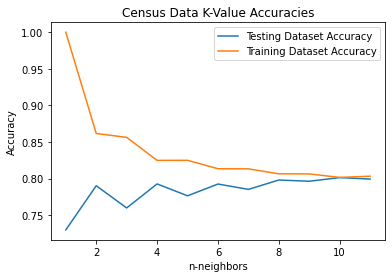

In [10]:
neighbors = np.arange(1,12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Looping over the K values:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    #Computing the training and test set accuracy:
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
#Creating a plot to showcase the results of the test:
plt.plot(neighbors, test_accuracy, label = 'Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Dataset Accuracy')

plt.legend()
plt.xlabel('n-neighbors')
plt.ylabel('Accuracy')
plt.title('Census Data K-Value Accuracies')
plt.show()

From this, we see an expected outcome: as the number of nearest neighbors increases (as the k value increases), the training data accuracy decreases due to the increase in model complexity. At the same time, the testing dataset accuracy increases with the increase in k value. The graph appears almost symmetrical when comparing the accuracy of the training and testing data. We notice that the testing and training dataset accuracy never fall below .70, which, in my opinion, suggests that knn is doing well on the census data no matter which k value we choose (if between 1 and 12). If we want to maximize the accuracy of the testing dataset, we should probably choose 10 nearest neighbors, based on the graph above. If we want to strike a fair balance between accuracy on the training and testing data, we may want to choose a k value between 3 and 6. 

### Problem 2:
Solve this problem using a using feed-forward neural network and report ROC on test data.

In [11]:
#We will now try to predict whether a person earns over 50k or not using a feed-forward
#neural network and reporting ROC on test data:

n_net = MLPClassifier()
census_net = n_net.fit(x_train, y_train)
net_pred = census_net.predict(x_test)
net_pred_prob = census_net.predict_proba(x_test)

#Printing Accuracy and ROC Scores:
print('Accuracy:', accuracy_score(y_test, net_pred))
print('ROC:', roc_auc_score(y_test, net_pred))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(last_index - 2):
    fpr[i], tpr[i], _ = roc_curve(y_test, net_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

Accuracy: 0.7758992209514338
ROC: 0.5329742628036958


Thus, we see that we have obtained an Accuracy score of approximately .797 and a ROC score of approximately .644, which are both relatively okay. We would like these values to be above .9, but we unfortunately do not have too much control over that.

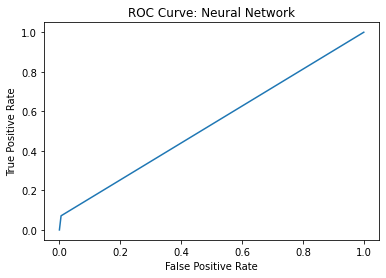

In [12]:
#Feed-forward Neural Network ROC Curve:
plt.plot(fpr[1], tpr[1])

plt.title('ROC Curve: Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

This ROC Curve shows us the tradeoff between sensitivity (or TPR) and specificity (1 - FPR). Classifiers that give curves closer to the top left corner indicate a better performance. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. Thus, we see that our test was unfortunately pretty inaccurate. 

### Problem 3:
Consider a data set containing four points located at the corners of the square. The two points on one diagonal belong to one class, and the two points on the other diagonal belong to the other class. Is this data set linearly separable? Provide a proof.

This datasrt contains four poitns located at the corners of a square. Therefore, we are dealing with 2-dimensional data. The two points on one diagonal belong to one class, and the two points on the other diagonal belong to the other class, as shown below:

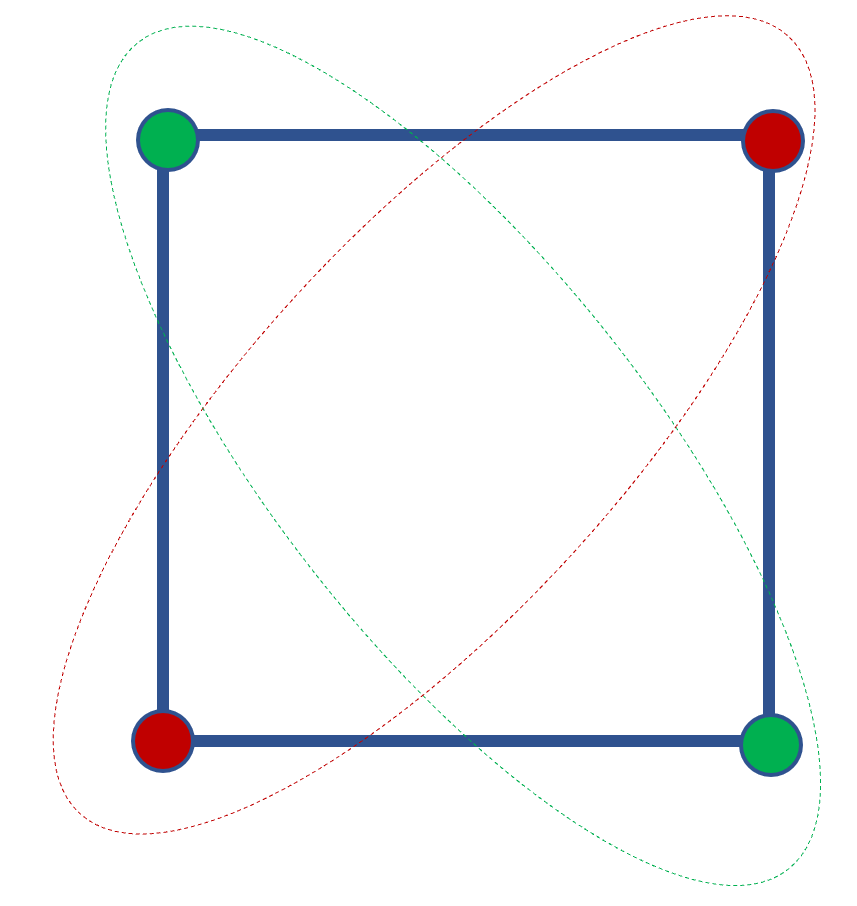

In [14]:
from IPython import display
display.Image("./squareQ3.PNG")

We show that this dataset is not linearly separable. First, we will call one of the two sets containing two points that make up the diagonal of the square X0 and the other set X1. In a n-dimensional Euclidean space, the two sets are linearly separable if there exists n+1 real numbers w1, w2, ...., wn, k such that:
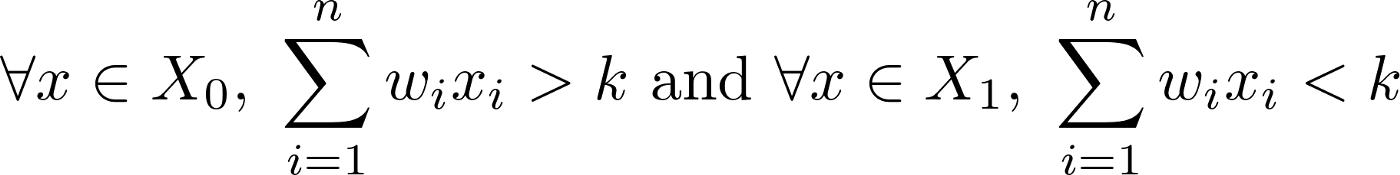

Graphically, X0 and X1 are linearly separable if there exist a line (since this is 2-dimensional data) that separates them. However, we can intuitively see that this cannot be the case with our dataset.

Specifically, since this dataset is two-dimensional, the only way for the data to be linearly separable is if there exists a line (rather than a plane or hyperplane) that separates them. However, one can notice that, no matter what line is drawn, the data cannot split the two classes with a straight line. Due to the nature of a square, it will always be the case that if one tries to put two points on the diagonal of a square on the same side of the line, then they have split the square into uneven partitions, in which one will contain three points and the other only one. We see this below:

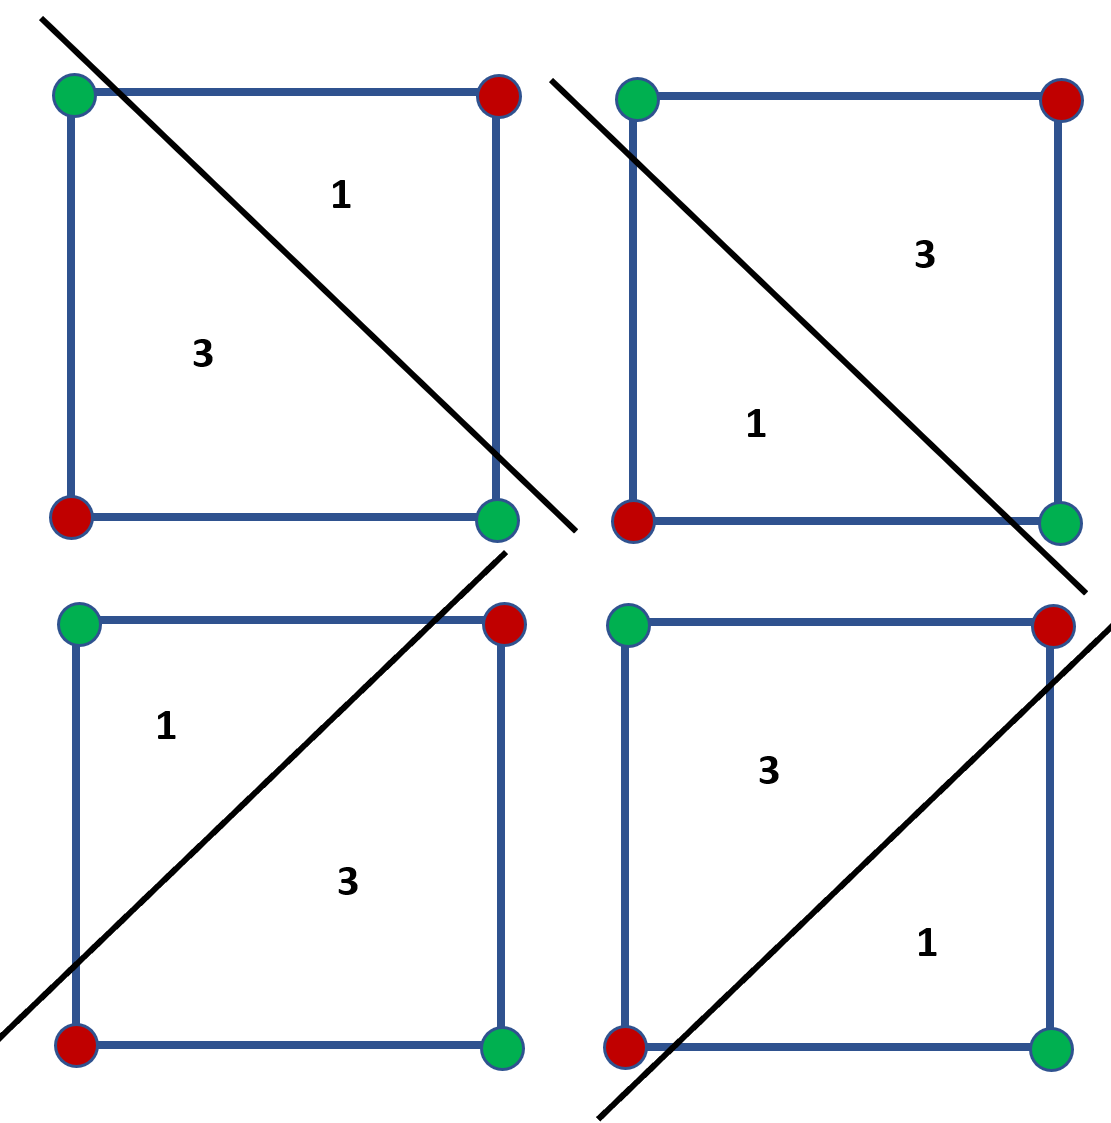

In [16]:
from IPython import display
display.Image("./foursquareQ3.PNG")

If we were to have split the square such that there are two points on one side and two on the other, all of these splits would require the two points to share a side of the square. However, if the two points are on the same side, then they must not be of the same class, as the points of each class do not share a side (being on the diagonal). Therefore, it can never be the case that only the two points of the certain class appear on one side of the line and the other two on the second side. Thus, this dataset is not linearly separable. 

I would like to mention that this question could also have been answered using a SVM. Support Vector Machines with linear kernel find the longest margin that separates the training data. For a loss function of a SVM with a linear kernel, if we set the C hyperparameter to a large number, we force the optimizer to make 0 error in classification in order to minimize the loss function. Thus, we overfit the data. If we are capable of overfitting the data with a linear model, that means the data is linearly separable. We note that the below function is the SVM Loss Function:

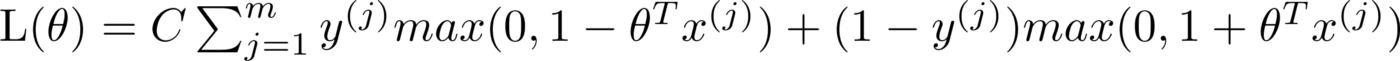

In [17]:
from IPython import display
display.Image("./svm loss function.PNG")

Thus, we would instantiate a SVM with a big C hyperparameter, train the model with this small dataset, classify the training set with the newly trained SVM, and take not of our classification accuracy. While the code has not been written here, it would be the case that we would not obtain 100% accuracy on classification, further proving that the data is not linearly separable.

### Problem 4:
(a) Suppose the fraction of undergraduate students who smoke is 15% and the fraction of graduate students who smoke is 23%. If one-fifth of the college students are graduate students and the rest are undergraduates, what is the probability that a student who smokes is a graduate student?

(b) Given the information in part (a), is a randomly chosen college student more likely to be a graduate or undergraduate student?

(c) Repeat part (b) assuming that the student is a smoker.

(d) Suppose 30% of the graduate students live in a dorm but only 10% of the undergraduate students live in a dorm. If a student smokes and lives in the dorm, is he or she more likely to be a graduate or undergraduate student? You can assume independence between students who live in a dorm and those who smoke.

- Fraction of Undegraduate Students (UG) who Smoke (S): $\frac{15}{100} = \frac{3}{20} =.15$
- Fraction of Graduate Students (G) who Smoke (S): $\frac{23}{100} = .23$
- Fraction of College Students who are Graduate Students (G): $\frac{1}{5} = .2$
- Fraction of College Students who are Undergraduate Students (UG): $\frac{4}{5} = .8$


a) We find the probability that a student who smokes is a graduate student using Bayes Theorem:
$$P(A|B) = \frac{P(B|A)\times P(A)}{P(B)}$$

Thus, we have:

Given: $P(S|UG) = .15, P(S|G) = .23, P(G) = .2, P(UG) = .8$.

According to Bayesian Theorem,
$$P(G|S) = \frac{P(S|G)\times P(G)}{P(S|G)\times P(G) + P(S|UG)\times P(UG)} = \frac{.23\times .2}{.23\times .2 + .15\times .8} = 0.277$$

Thus, the probability that a student who smokes is a graduate student is approximately .277.

b) Given the information in part (a), we will show whether a randomly chosen college student is more likely to be a graduate or undergraduate student:
It is evident that a randomly chosen student is more likely to be an undergraduate as 4/5, or 80%, of college students are undergraduates, while only 1/5, or 20%, are graduates. The larger proportion of undergraduate students makes it more likely for one to randomly choose one than a graduate student.

c) Given the information in part (a), we will show whether a randomly chosen college student is more likely to be a graduate or undergraduate student given that the student is a smoker:

To determine this, we have to compare: $P(UG|S)$ and $P(G|S)$. 
$P(G|S) = .277$ was found above, so we now determine $P(UG|S)$:
$$P(UG|S) = \frac{P(S|UG)\times P(UG)}{P(S|G)\times P(G) + P(S|UG)\times P(UG)} = \frac{.15\times .8}{.23\times .2 + .15\times .8} = 0.723$$
We find that the probability that a student who smokes is an undergraduate student is approximately .723. 

Now, since $.723 > .277$, it is evident that $P(UG|S) > P(G|S)$, so a randomly chosen college student is more likely to be an undergraduate student, given that they are a smoker.

d) Finally, suppose 30% of the graduate students live in a dorm but only 10% of the undergraduate students live in a dorm. If a student smokes and lives in the dorm, we determine if he or she more likely to be a graduate or undergraduate student. We can assume independence between students who live in a dorm and those who smoke:

- Fraction of Undegraduate Students (UG) who Live in a Dorm (D): $\frac{10}{100} = \frac{1}{10} =.1$
- Fraction of Graduate Students (G) who Live in a Dorm (D): $\frac{30}{100} = \frac{3}{10} =.3$

We must find: $P(G|S \cap D)$ and $P(UG|S \cap D)$:

$$P(G|S \cap D) = \frac{P(S \cap D|G)\times P(G)}{P(S \cap D|G)\times P(G) + P(S \cap D|UG)\times P(UG)} = \frac{P(S|G)\times P(D|G)\times P(G)}{[P(S|G)\times P(D|G)\times P(G)] + [P(S|UG)\times P(D|UG)\times P(UG)]}$$
and
$$P(UG|S \cap D) = \frac{P(S \cap D|UG)\times P(UG)}{P(S \cap D|G)\times P(G) + P(S \cap D|UG)\times P(UG)} = \frac{P(S|UG)\times P(D|UG)\times P(UG)}{[P(S|G)\times P(D|G)\times P(G)] + [P(S|UG)\times P(D|UG)\times P(UG)]}$$

We know that:
$P(S|UG) = .15, P(S|G) = .23, P(G) = .2, P(UG) = .8, P(D|G) = .3, P(D|UG) = .1$

Thus, we have:
$$P(G|S \cap D) = \frac{.23\times .3\times .2}{.23\times .3\times .2 + .15\times .1\times .8} = .535$$
$$P(UG|S \cap D) = \frac{.15\times .1\times .8}{.23\times .3\times .2 + .15\times .1\times .8} = .465$$

Therefore, since $.535 > .465$, it is evident that $P(G|S \cap D) > P(UG|S \cap D)$, so a student who smokes and lives in a dorm is slightly more likely to be a graduate student.